In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [5]:
df = pd.read_csv("traffic_accidents.csv", parse_dates=["DateTime"])

<ipython-input-6-76194d149b0d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="AccidentSeverity", palette="coolwarm")


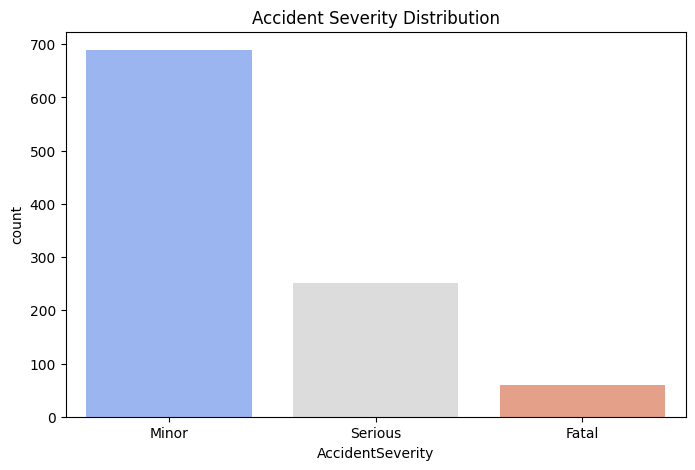

In [6]:
# EDA: Plot accident severity distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="AccidentSeverity", palette="coolwarm")
plt.title("Accident Severity Distribution")
plt.show()

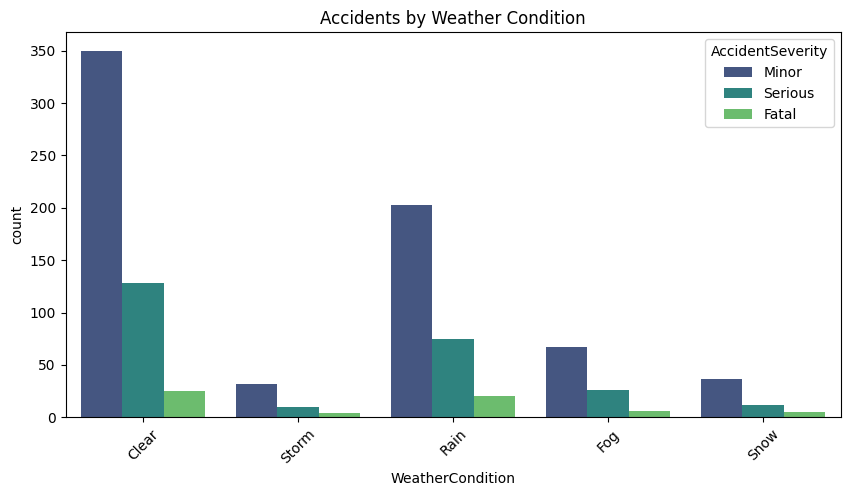

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="WeatherCondition", hue="AccidentSeverity", palette="viridis")
plt.xticks(rotation=45)
plt.title("Accidents by Weather Condition")
plt.show()

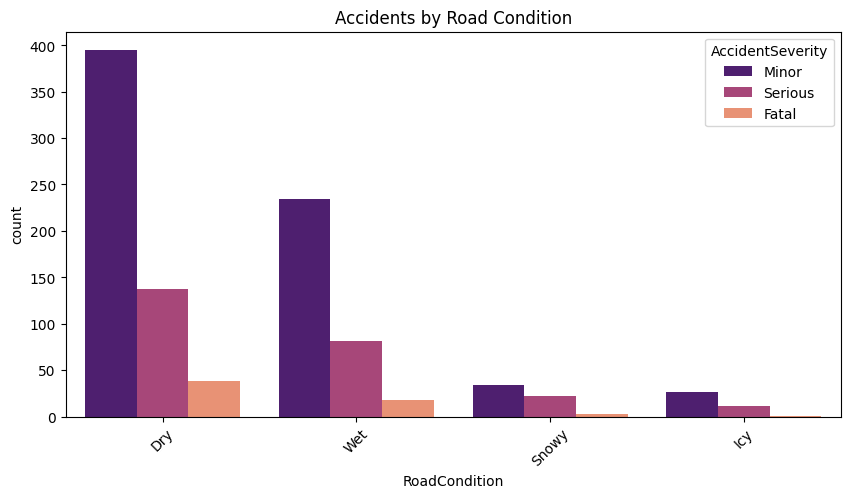

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="RoadCondition", hue="AccidentSeverity", palette="magma")
plt.xticks(rotation=45)
plt.title("Accidents by Road Condition")
plt.show()

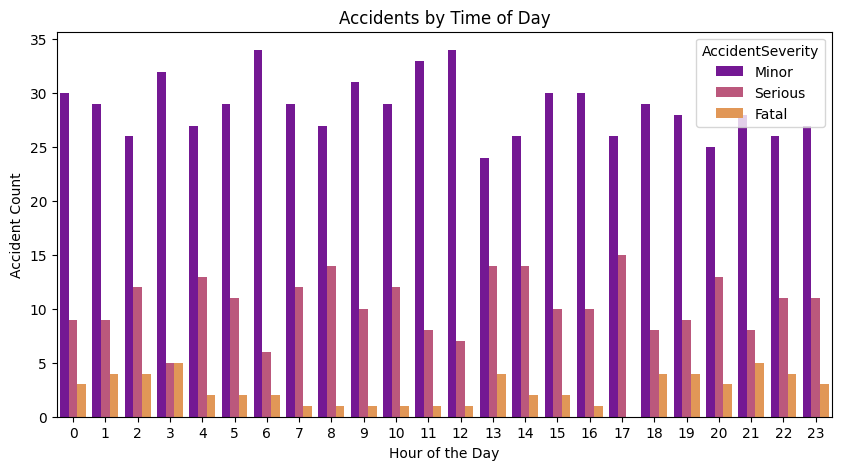

In [9]:
df["Hour"] = df["DateTime"].dt.hour
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Hour", hue="AccidentSeverity", palette="plasma")
plt.title("Accidents by Time of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Accident Count")
plt.show()


In [10]:
m = folium.Map(location=[df["Latitude"].mean(), df["Longitude"].mean()], zoom_start=12)
heat_data = [[row["Latitude"], row["Longitude"]] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)
m.save("traffic_accident_heatmap.html")
print("Heatmap saved as 'traffic_accident_heatmap.html'")

Heatmap saved as 'traffic_accident_heatmap.html'


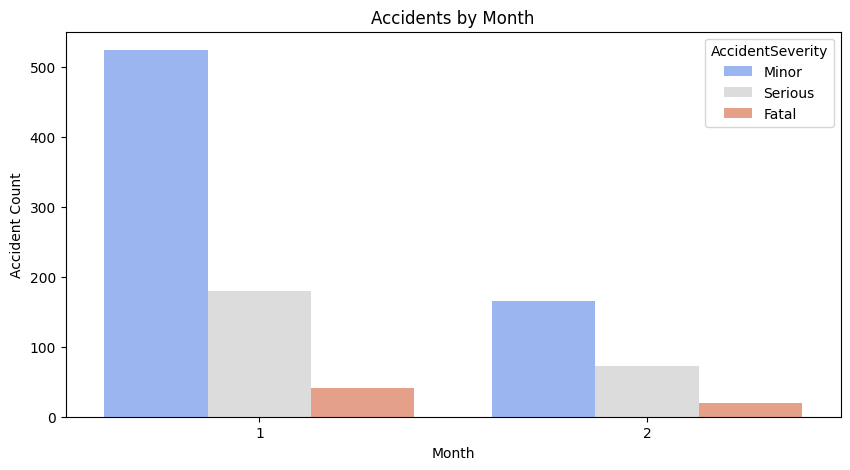

In [11]:
df["Month"] = df["DateTime"].dt.month
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Month", hue="AccidentSeverity", palette="coolwarm")
plt.title("Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Accident Count")
plt.show()

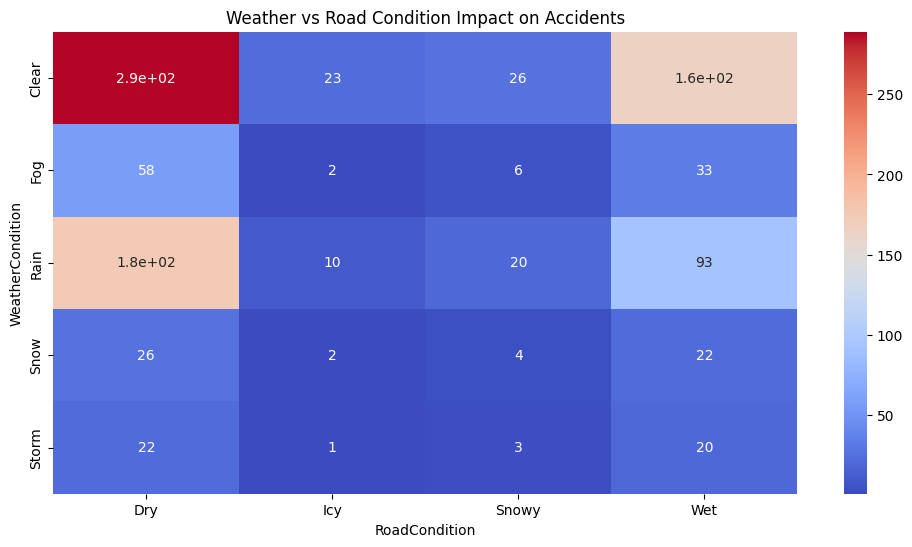

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(df["WeatherCondition"], df["RoadCondition"]), annot=True, cmap="coolwarm")
plt.title("Weather vs Road Condition Impact on Accidents")
plt.show()

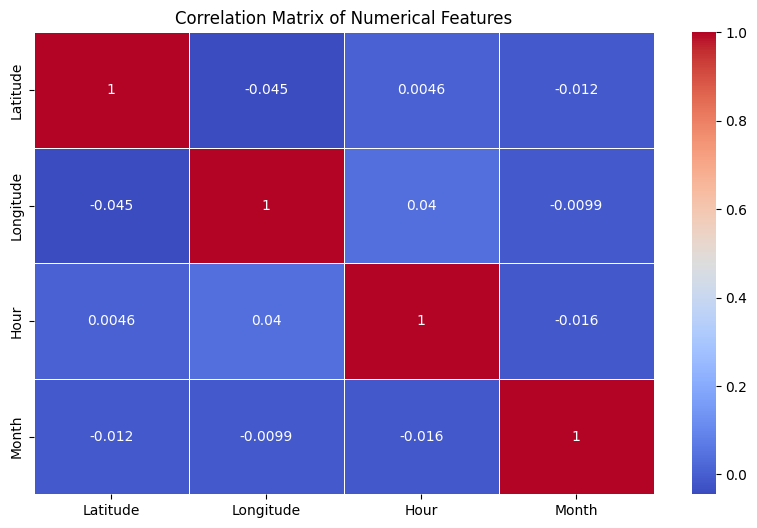

In [13]:
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()